## 1. 시각화 라이브러리 사용
### 1-1. 한글 폰트 설치

- 참고 1 : https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb
- 참고 2 : https://teddylee777.github.io/colab/colab-korean

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,412 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [ ]:
# 경고 표시하지않기

import warnings

warnings.filterwarnings(action='ignore')

### 1-2. 런타임 다시시작 : 재실행하기


### 1-3. Matplotlib vs seaborn

seaborn은 Matplotlib 위에 구축된 Python 플로팅 라이브러리입니다.

Matplotlib보다 더 보기 좋은 스타일 기본값으로 데이터 세트를 빠르게 시각화하는 간결하지만 제한된 접근 방식을 허용합니다.

In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns 

In [ ]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
# 데이터 준비
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data

array([ -150,  -324,  -337,  -532,  -484,  -582,  -555,  -471,  -531,
        -642,  -549,  -626,  -538,  -664,  -610,  -602,  -571,  -504,
        -703,  -799,  -940, -1041, -1164, -1333, -1262, -1283, -1440,
       -1581, -1664, -1770, -1737, -1858, -2032, -2058, -2121, -2294,
       -2470, -2574, -2749, -2886, -2825, -2840, -2899, -3016, -3010,
       -2954, -3151, -3308, -3266, -3307])

Text(0.5, 0, '시간(분)')

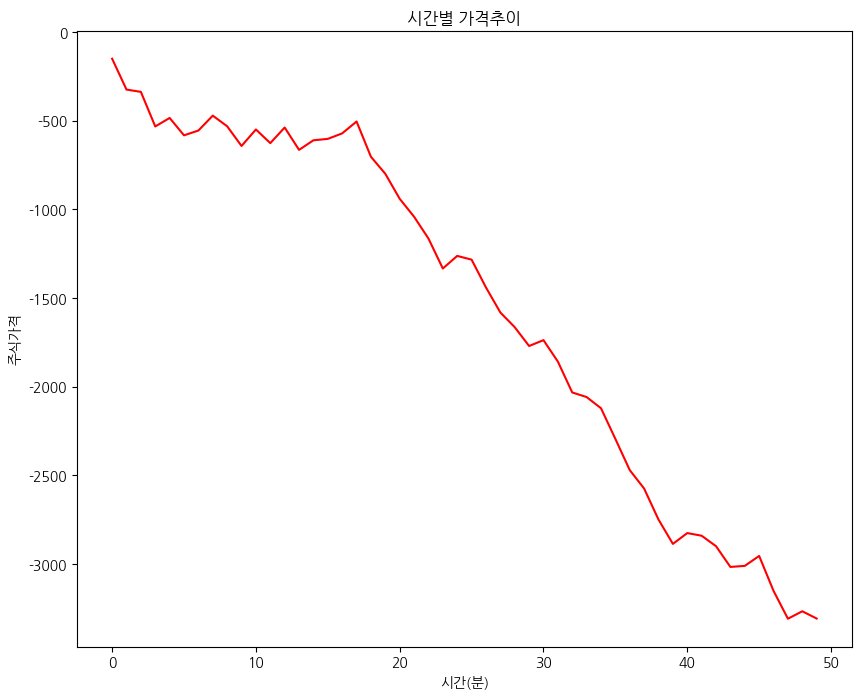

In [ ]:
# 한글을 넣어놓고 그려보면 잘 나온다!

plt.figure(figsize=(10,8))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

## 2. GoogleMaps 패키지 설치

- Google Cloud 지오코딩 API 사용 절차 등록
- https://teddylee777.github.io/data_science/geocoding

In [ ]:
# googlemaps 설치
!pip install googlemaps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40718 sha256=e63e0c37eec8bdcf2bd15087718ff5c37affebbf0c9481ff62ad63c53cb25b84
  Stored in directory: /root/.cache/pip/wheels/d9/5f/46/54a2bdb4bcb07d3faba4463d2884865705914cc72a7b8bb5f0
Successfully built googlemaps


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# private_key = # Google Cloud API 키를 입력합니다.
private_key = open('/content/drive/MyDrive/code/My_GOOGLE_MAP_API_KEY.txt', 'r')
google_map_key = private_key.readline()

# Google Cloud API 키
google_map_key[:10]

'AIzaSyB3Np'

`googlemaps` 패키지 import 

In [ ]:
import googlemaps
import os

# maps 객체 생성
maps = googlemaps.Client(key=google_map_key)
maps

**지역 명칭**을 직접 입력하여 위/경도 좌표계를 구할 수 있습니다.

- 명칭 입력시 return은 `json` 리스트를 반환합니다.

In [ ]:
# 코드입력
results = maps.geocode('판교역')
results

[{'address_components': [{'long_name': 'Pangyo Station',
    'short_name': 'Pangyo Station',
    'types': ['establishment',
     'point_of_interest',
     'subway_station',
     'transit_station']},
   {'long_name': '160', 'short_name': '160', 'types': ['premise']},
   {'long_name': 'Pangyoyeok-ro',
    'short_name': 'Pangyoyeok-ro',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '삼평동',
    'short_name': '삼평동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': 'Bundang-gu',
    'short_name': 'Bundang-gu',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': 'Seongnam-si',
    'short_name': 'Seongnam-si',
    'types': ['locality', 'political']},
   {'long_name': 'Gyeonggi-do',
    'short_name': 'Gyeonggi-do',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'South Korea',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '13529'

`results`로부터 위/경도 데이터를 추출합니다.

In [ ]:
for result in results:
    print(result['geometry']['location'])
    break
    
lat, lng = result['geometry']['location']['lat'], result['geometry']['location']['lng']

{'lat': 37.394776, 'lng': 127.11116}


## 3. Folium을 사용한 지도 시각화

In [ ]:
import folium


m = folium.Map(location=[lat, lng],
               zoom_start=17, 
               width=750, 
               height=500
              )

folium.Marker([lat, lng],
              popup="학동역",
              tooltip="학동역 입구").add_to(m)
m

위의 기능들을 하나로 묶어 함수를 생성합니다.

In [ ]:
def viz_map(place):
    # 코드입력
    results = maps.geocode(place)
    
    lat, lng = None, None
    
    for result in results:
        lat, lng = result['geometry']['location']['lat'], result['geometry']['location']['lng']
        print(f'위도: {lat:.3f}, 경도: {lng:.3f}')
        break
    
    if lat is None:
        return '검색 결과를 찾을 수 없습니다.'

    # folium 시각화
    m = folium.Map(location=[lat, lng],
                   zoom_start=17, 
                   width=750, 
                   height=500
                  )

    folium.Marker([lat, lng],
                  popup=place).add_to(m)
    return m

In [ ]:
viz_map('고덕역')

위도: 37.555, 경도: 127.154


## 4. 공공데이터 다운로드 및 주소 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import os

DATA = 'data'

[서울교통공사 역주소 데이터 다운로드](http://data.seoul.go.kr/dataList/OA-12035/S/1/datasetView.do;jsessionid=7C7AC42AD377ADC8D042A39DAF162243.new_portal-svr-11)

In [ ]:
!pip install teddynote -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
from teddynote import dataset

dataset.download('역주소전화번호')

======= 다운로드 시작 =======

data/서울교통공사_역주소.xlsx


  0%|          | 0.00/29.6k [00:00<?, ?B/s]


======= 다운로드 완료 =======


In [ ]:
filepath = os.path.join(DATA, '서울교통공사_역주소.xlsx')
filepath

'data/서울교통공사_역주소.xlsx'

`서울교통공사_역주소.xlsx` 데이터셋을 로드합니다.

In [ ]:
file = '/content/drive/MyDrive/code/data/서울교통공사_역주소.xlsx'
pd.read_excel(file)

,연번,역번호,호선,역명,역전화번호,역주소
0,1,150,1,서울역,02-6110-1331,서울특별시 중구 세종대로 지하 2 (남대문로 5가)
1,2,151,1,시청,02-6110-1321,서울특별시 중구 세종대로 지하 101 (정동)
2,3,152,1,종각,02-6110-1311,서울특별시 종로구 종로 지하 55 (종로1가)
3,4,153,1,종로3가,02-6110-1301,서울특별시 종로구 종로 지하 129 (종로3가)
4,5,154,1,종로5가,02-6110-1291,서울특별시 종로구 종로 지하 216 (종로5가)
...,...,...,...,...,...,...
287,288,4134,9,송파나루,02-2656-0934,서울특별시 송파구 오금로 165
288,289,4135,9,한성백제,02-2656-0935,서울특별시 송파구 위례성대로 51
289,290,4136,9,올림픽공원,02-2656-0936,서울특별시 송파구 양재대로 1233
290,291,4137,9,둔촌오륜,02-2656-0937,서울특별시 송파구 강동대로 327


In [ ]:
address = pd.read_excel(filepath)
address.head()

,연번,역번호,호선,역명,역전화번호,역주소
0,1,150,1,서울역,02-6110-1331,서울특별시 중구 세종대로 지하 2 (남대문로 5가)
1,2,151,1,시청,02-6110-1321,서울특별시 중구 세종대로 지하 101 (정동)
2,3,152,1,종각,02-6110-1311,서울특별시 종로구 종로 지하 55 (종로1가)
3,4,153,1,종로3가,02-6110-1301,서울특별시 종로구 종로 지하 129 (종로3가)
4,5,154,1,종로5가,02-6110-1291,서울특별시 종로구 종로 지하 216 (종로5가)


**역명** 중복 값을 제거합니다.

In [ ]:
# 코드입력
address = address.drop_duplicates('역명')
address

,연번,역번호,호선,역명,역전화번호,역주소
0,1,150,1,서울역,02-6110-1331,서울특별시 중구 세종대로 지하 2 (남대문로 5가)
1,2,151,1,시청,02-6110-1321,서울특별시 중구 세종대로 지하 101 (정동)
2,3,152,1,종각,02-6110-1311,서울특별시 종로구 종로 지하 55 (종로1가)
3,4,153,1,종로3가,02-6110-1301,서울특별시 종로구 종로 지하 129 (종로3가)
4,5,154,1,종로5가,02-6110-1291,서울특별시 종로구 종로 지하 216 (종로5가)
...,...,...,...,...,...,...
285,286,4132,9,석촌고분,02-2656-0932,서울특별시 송파구 삼학사로 53
287,288,4134,9,송파나루,02-2656-0934,서울특별시 송파구 오금로 165
288,289,4135,9,한성백제,02-2656-0935,서울특별시 송파구 위례성대로 51
290,291,4137,9,둔촌오륜,02-2656-0937,서울특별시 송파구 강동대로 327


**역주소** 데이터를 `geocode`에 적용하여 위/경도 좌표계를 구합니다.

In [ ]:
address['역주소'][0]

'서울특별시 중구 세종대로 지하 2 (남대문로 5가)'

In [ ]:
viz_map(address['역주소'][0])

위도: 37.559, 경도: 126.974


역주소 끝에는 괄호안에 동이 같이 표기되어 있습니다.

In [ ]:
station_list = list(address['역주소'])
station_list

['서울특별시 중구 세종대로 지하 2 (남대문로 5가)',
 '서울특별시 중구 세종대로 지하 101 (정동)',
 '서울특별시 종로구 종로 지하 55 (종로1가)',
 '서울특별시 종로구 종로 지하 129 (종로3가)',
 '서울특별시 종로구 종로 지하 216  (종로5가)',
 '서울특별시 종로구 종로 지하 302 (창신동)',
 '서울특별시 동대문구 왕산로 지하 1 (신설동)',
 '서울특별시 동대문구 왕산로 지하 93 (제기동)',
 '서울특별시 동대문구 왕산로 지하 205(전농동)',
 '서울특별시 종로구 종로 359 (숭인동)',
 '서울특별시 강서구 강서로 지하54 (화곡동)',
 '서울특별시 중구 세종대로 지하 101 (정동)',
 '서울특별시 중구 을지로 지하 42 (을지로1가)',
 '서울특별시 중구 을지로 지하 106 (을지로3가)',
 '서울특별시 중구 을지로 지하 178 (을지로4가)',
 '서울특별시 중구 을지로 지하 279 (을지로7가)',
 '서울특별시 중구 퇴계로 지하 431-1 (신당동)',
 '서울특별시 성동구 왕십리로 지하 374 (하왕십리동)',
 '서울특별시 성동구 왕십리로 지하300 (행당동)',
 '서울특별시 성동구 왕십리로 206 (행당동)',
 '서울특별시 성동구 아차산로 18 (성수동1가)',
 '서울특별시 성동구 아차산로 100 (성수동2가)',
 '서울특별시 광진구 아차산로 243 (화양동)',
 '서울특별시 광진구 아차산로 384-1 (구의동)',
 '서울특별시 광진구 강변역로 53 (구의동)',
 '서울특별시 송파구 오금로 20 (신천동)',
 '서울특별시 송파구 올림픽로 지하 265 (잠실동)',
 '서울특별시 송파구 올림픽로 지하 140 (잠실동)',
 '서울특별시 송파구 올림픽로 지하 23 (잠실동)',
 '서울특별시 강남구 테헤란로 지하 538 (삼성동)',
 '서울특별시 강남구 테헤란로 지하 340 (삼성동)',
 '서울특별시 강남구 테헤란로 지하 156 (역삼동)',
 '서울특별시 강남구 강남대로

## 5. Regex 적용으로 주소 데이터 정제

참고 사이트

[Regexr.com](https://regexr.com/)

In [ ]:
import re

# 코드입력
# Regular Expression 적용하여 ()괄호를 제거 후 추출
pattern_string = r'.+(?=\()'
pattern = re.compile(pattern_string)

In [ ]:
pattern.match('서울특별시 중구 세종대로 지하 2 (남대문로 5가)').group().strip()

'서울특별시 중구 세종대로 지하 2'

## 6. 주소 데이터 클린징

In [ ]:
def clean_address(x):
    # 코드입력
    location = pattern.match(x)
    if location:
        loc = location.group().strip()
    else:
        loc = x
    return loc   

`clean_address` 적용

In [ ]:
# 코드입력
address['주소'] = address['역주소'].apply(clean_address)
address.head()

,연번,역번호,호선,역명,역전화번호,역주소,주소
0,1,150,1,서울역,02-6110-1331,서울특별시 중구 세종대로 지하 2 (남대문로 5가),서울특별시 중구 세종대로 지하 2
1,2,151,1,시청,02-6110-1321,서울특별시 중구 세종대로 지하 101 (정동),서울특별시 중구 세종대로 지하 101
2,3,152,1,종각,02-6110-1311,서울특별시 종로구 종로 지하 55 (종로1가),서울특별시 종로구 종로 지하 55
3,4,153,1,종로3가,02-6110-1301,서울특별시 종로구 종로 지하 129 (종로3가),서울특별시 종로구 종로 지하 129
4,5,154,1,종로5가,02-6110-1291,서울특별시 종로구 종로 지하 216 (종로5가),서울특별시 종로구 종로 지하 216


### geocode 변환 및 위/경도 데이터 생성

geocode 변환 함수화

In [ ]:
def geocode(x):
    # 코드입력
    results = maps.geocode(x)
    if len(results) > 0:
        result = results[0]
        return result['geometry']['location']['lat'], result['geometry']['location']['lng']
    else:
        return np.nan        

샘플 데이터 변환

In [ ]:
print(station_list[1])
geocode(station_list[1])

서울특별시 중구 세종대로 지하 101 (정동)


(37.5666082, 126.9731481)

위경도 좌표계로 변환합니다. (tuple 형식으로 반환)

In [ ]:
# 코드입력
address['위경도'] = address['주소'].apply(geocode)

위경도로 변환되지 않는 값 확인(결측치 확인)

In [ ]:
address.loc[address['위경도'].isnull()]

,연번,역번호,호선,역명,역전화번호,역주소,주소,위경도
192,193,2631,6,이태원,02-6311-6301,서울특별시 용산구 이태원로 지하177 (이태원동),서울특별시 용산구 이태원로 지하177,NaN
193,194,2632,6,한강진,02-6311-6311,서울특별시 용산구 이태원로 지하287 (한남동),서울특별시 용산구 이태원로 지하287,NaN


In [ ]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      292 non-null    int64 
 1   역번호     292 non-null    int64 
 2   호선      292 non-null    int64 
 3   역명      292 non-null    object
 4   역전화번호   292 non-null    object
 5   역주소     292 non-null    object
 6   주소      292 non-null    object
 7   위경도     290 non-null    object
dtypes: int64(3), object(5)
memory usage: 18.4+ KB


`lat`와 `lng` 컬럼 생성 후 위경도 데이터 분리하여 대입

In [ ]:
# 코드입력
address['lat'] = address['위경도'].str[0]
address['lng'] = address['위경도'].str[1]

In [ ]:
address.head()

,연번,역번호,호선,역명,역전화번호,역주소,주소,위경도,lat,lng
0,1,150,1,서울역,02-6110-1331,서울특별시 중구 세종대로 지하 2 (남대문로 5가),서울특별시 중구 세종대로 지하 2,"(37.563054, 126.9755254)",37.563054,126.975525
1,2,151,1,시청,02-6110-1321,서울특별시 중구 세종대로 지하 101 (정동),서울특별시 중구 세종대로 지하 101,"(37.563054, 126.9755254)",37.563054,126.975525
2,3,152,1,종각,02-6110-1311,서울특별시 종로구 종로 지하 55 (종로1가),서울특별시 종로구 종로 지하 55,"(37.5701735, 126.985657)",37.570174,126.985657
3,4,153,1,종로3가,02-6110-1301,서울특별시 종로구 종로 지하 129 (종로3가),서울특별시 종로구 종로 지하 129,"(37.5701735, 126.985657)",37.570174,126.985657
4,5,154,1,종로5가,02-6110-1291,서울특별시 종로구 종로 지하 216 (종로5가),서울특별시 종로구 종로 지하 216,"(37.5701735, 126.985657)",37.570174,126.985657


In [ ]:
address[['호선', '역명', 'lat', 'lng', '주소', '역번호']]

,호선,역명,lat,lng,주소,역번호
0,1,서울역,37.563054,126.975525,서울특별시 중구 세종대로 지하 2,150
1,1,시청,37.563054,126.975525,서울특별시 중구 세종대로 지하 101,151
2,1,종각,37.570174,126.985657,서울특별시 종로구 종로 지하 55,152
3,1,종로3가,37.570174,126.985657,서울특별시 종로구 종로 지하 129,153
4,1,종로5가,37.570174,126.985657,서울특별시 종로구 종로 지하 216,154
...,...,...,...,...,...,...
287,9,송파나루,37.510145,127.113141,서울특별시 송파구 오금로 165,4134
288,9,한성백제,37.517370,127.116398,서울특별시 송파구 위례성대로 51,4135
289,9,올림픽공원,37.516550,127.131134,서울특별시 송파구 양재대로 1233,4136
290,9,둔촌오륜,37.524190,127.123040,서울특별시 송파구 강동대로 327,4137


## 7. 파일로 변환 (.csv로 내보내기)

위,경도 데이터로 변환된 파일 내보내기

In [ ]:
address[['호선', '역명', 'lat', 'lng', '주소', '역번호']].to_csv('seoul_station_geocode.csv', index=False)

In [ ]:
pd.read_csv('/content/drive/MyDrive/code/seoul_station_geocode.csv')

,호선,역명,lat,lng,주소,역번호
0,1,서울역,37.564119,126.976808,서울특별시 중구 세종대로 지하 2,150
1,1,시청,37.565704,126.976862,서울특별시 중구 세종대로 지하 101,151
2,1,종각,37.570169,126.983099,서울특별시 종로구 종로 지하 55,152
3,1,종로3가,37.570371,126.991005,서울특별시 종로구 종로 지하 129,153
4,1,종로5가,37.559785,126.970986,서울특별시 종로구 종로 지하 216,154
...,...,...,...,...,...,...
248,9,석촌고분,37.501983,127.096596,서울특별시 송파구 삼학사로 53,4132
249,9,송파나루,37.510080,127.113112,서울특별시 송파구 오금로 165,4134
250,9,한성백제,37.516359,127.113315,서울특별시 송파구 위례성대로 51,4135
251,9,둔촌오륜,37.524990,127.120881,서울특별시 송파구 강동대로 327,4137
